# **1. Import Library**

In [20]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

In [53]:
df = pd.read_csv("https://drive.google.com/uc?id=1GmxdLsSadOGiME7LfCYd6P8-iJ42MnG-")

# **4. Exploratory Data Analysis (EDA)**

In [54]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [23]:
df.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


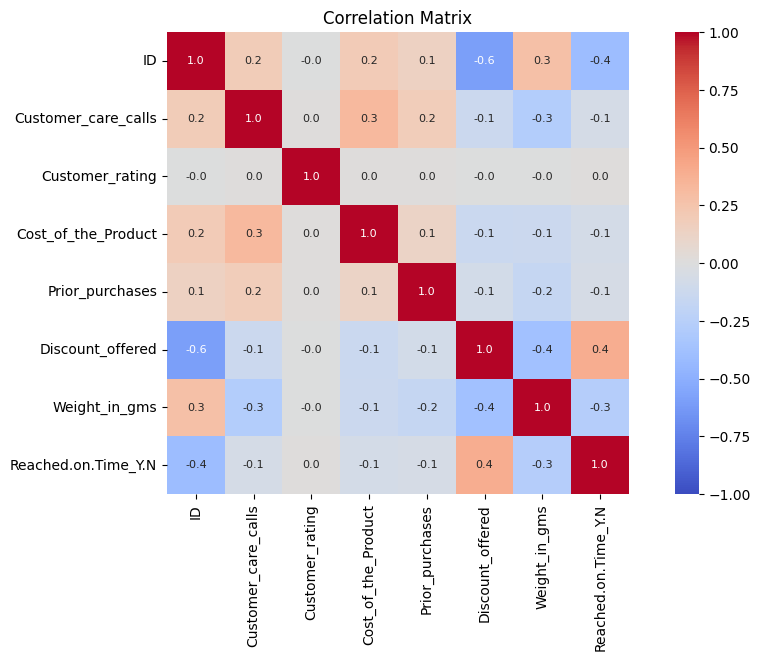

In [25]:
# Menampilkan heatmap korelasi pada kolom numerik dengan target

numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
plt.figure(figsize=(12, 6))
correlation_matrix = df[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True, fmt='.1f', annot_kws={'size':8})
plt.title('Correlation Matrix')
plt.show()

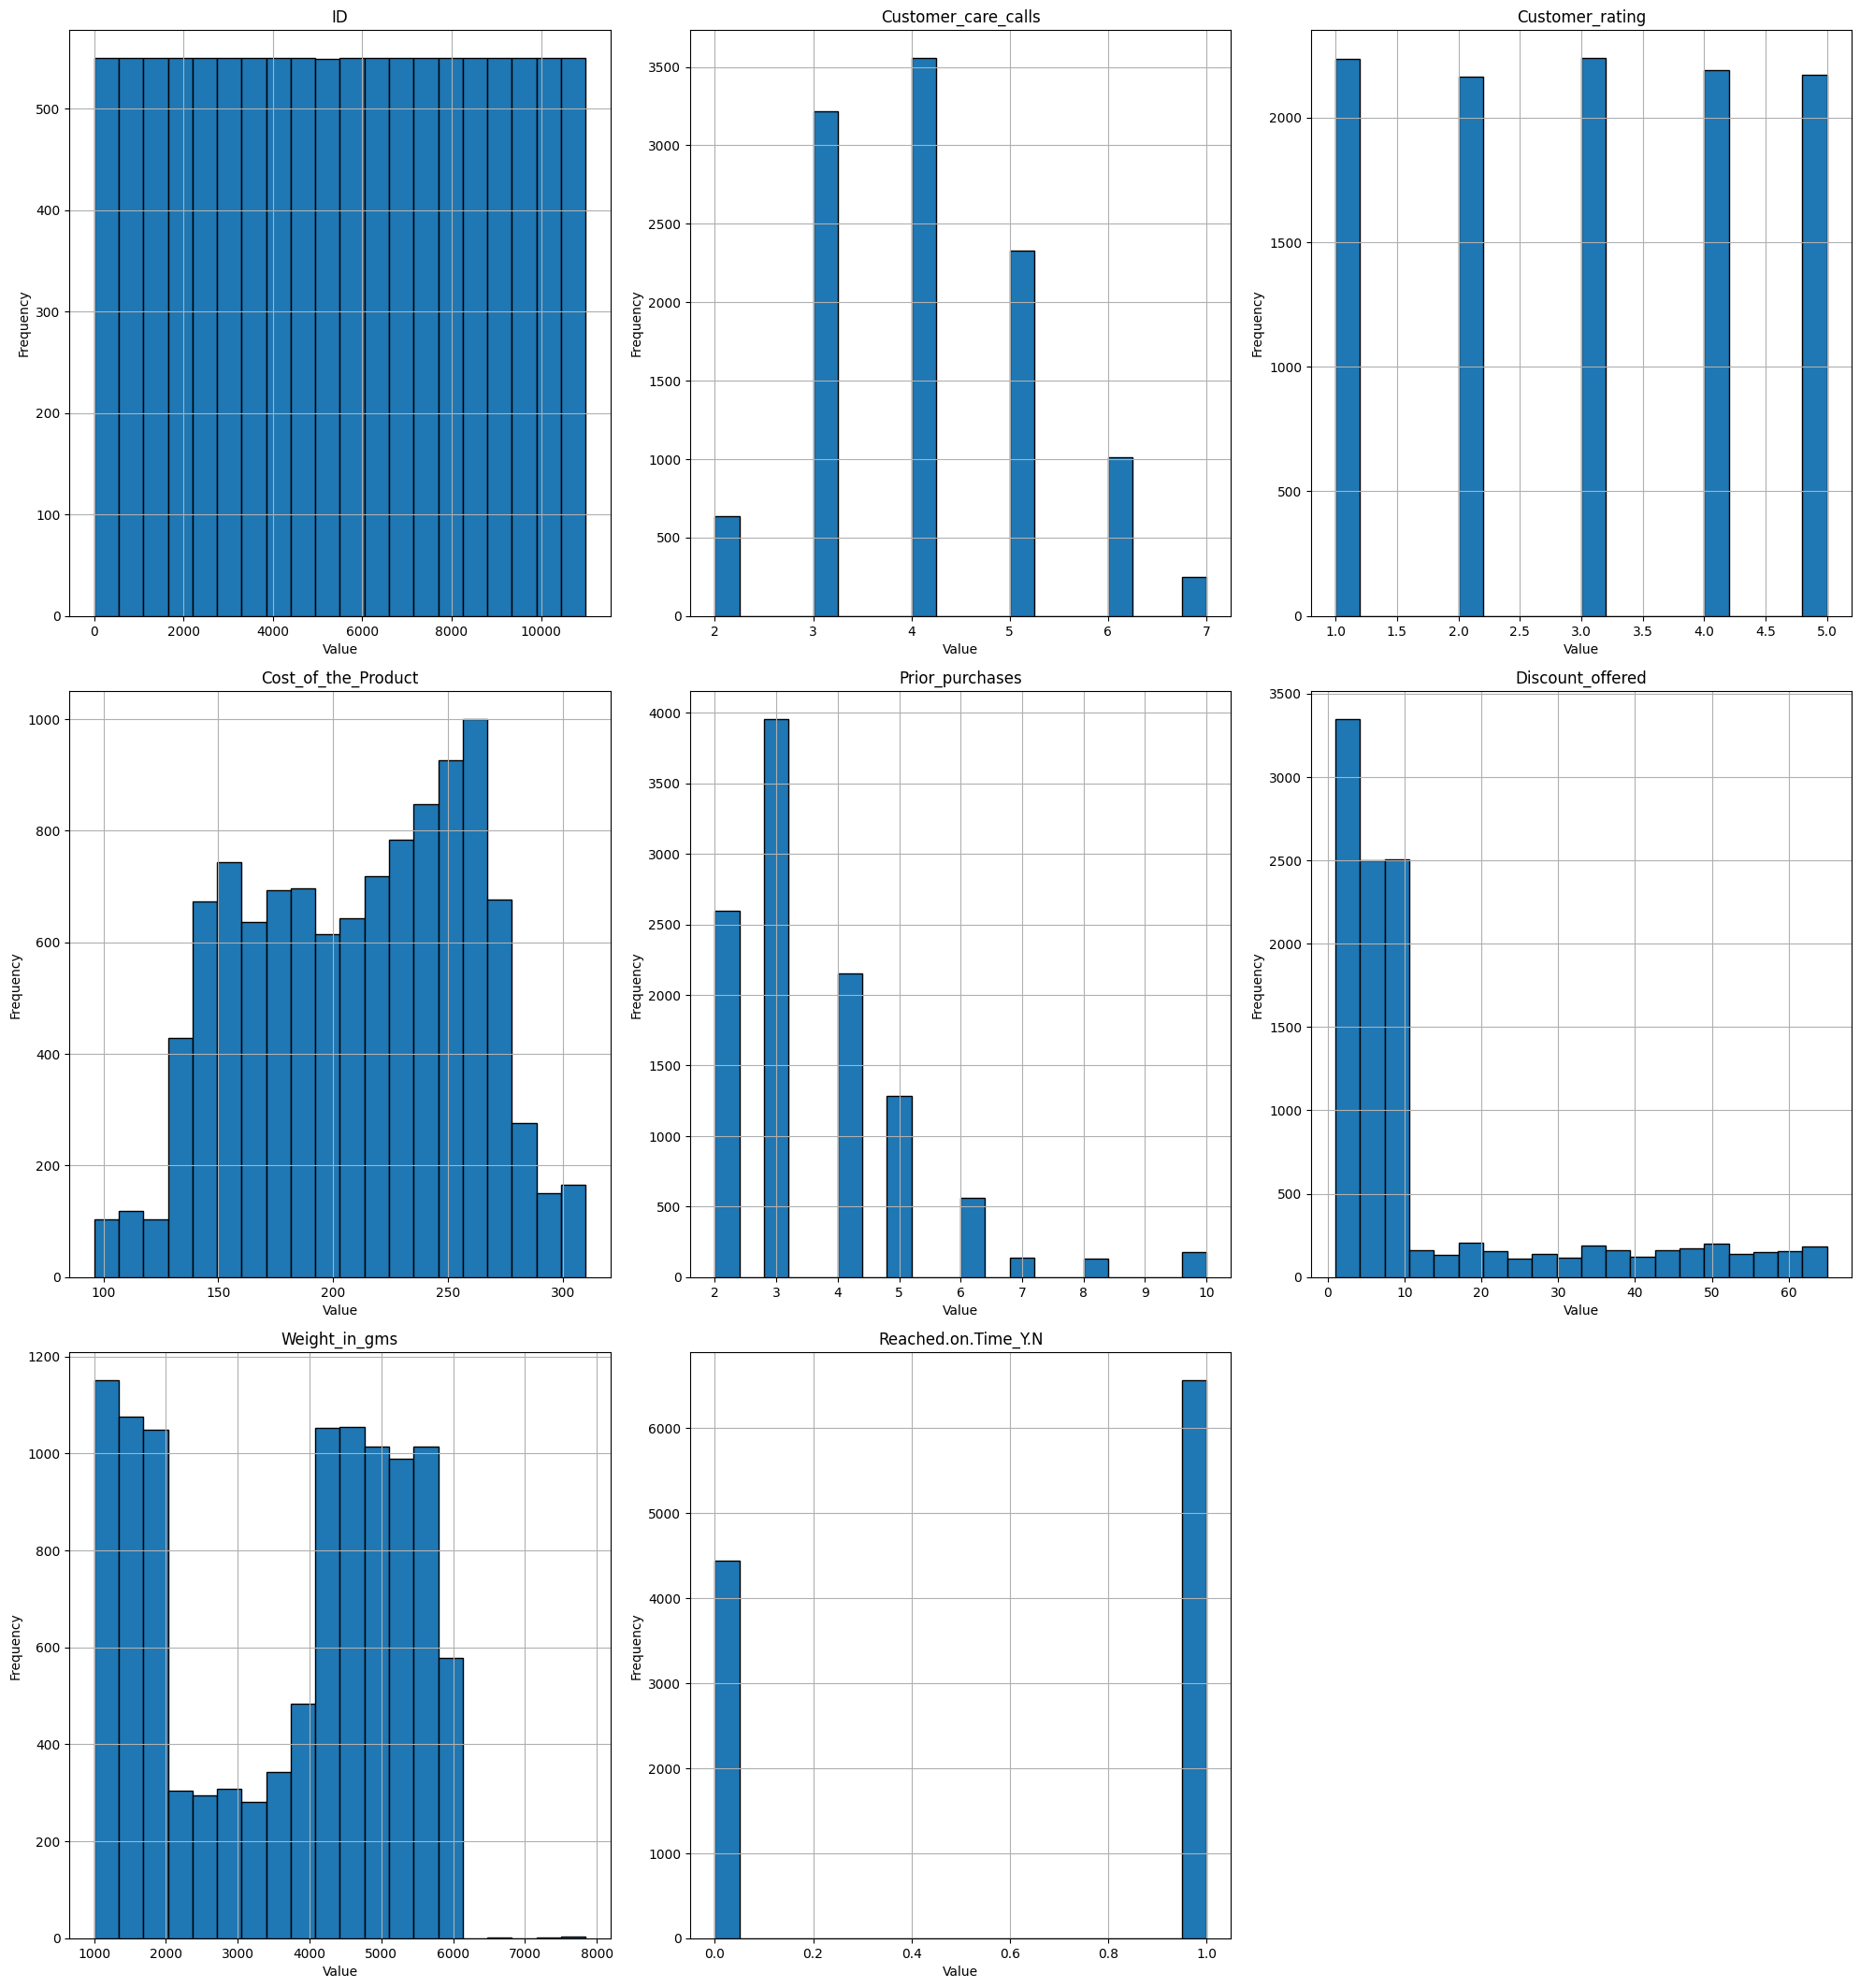

In [26]:
# Menampilkan histogram untuk semua kolom numerik

num_vars = df.shape[1]

n_cols = 3
n_rows = -(-num_vars // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 7))
axes = axes.flatten()

for i, column in enumerate(numeric_features):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

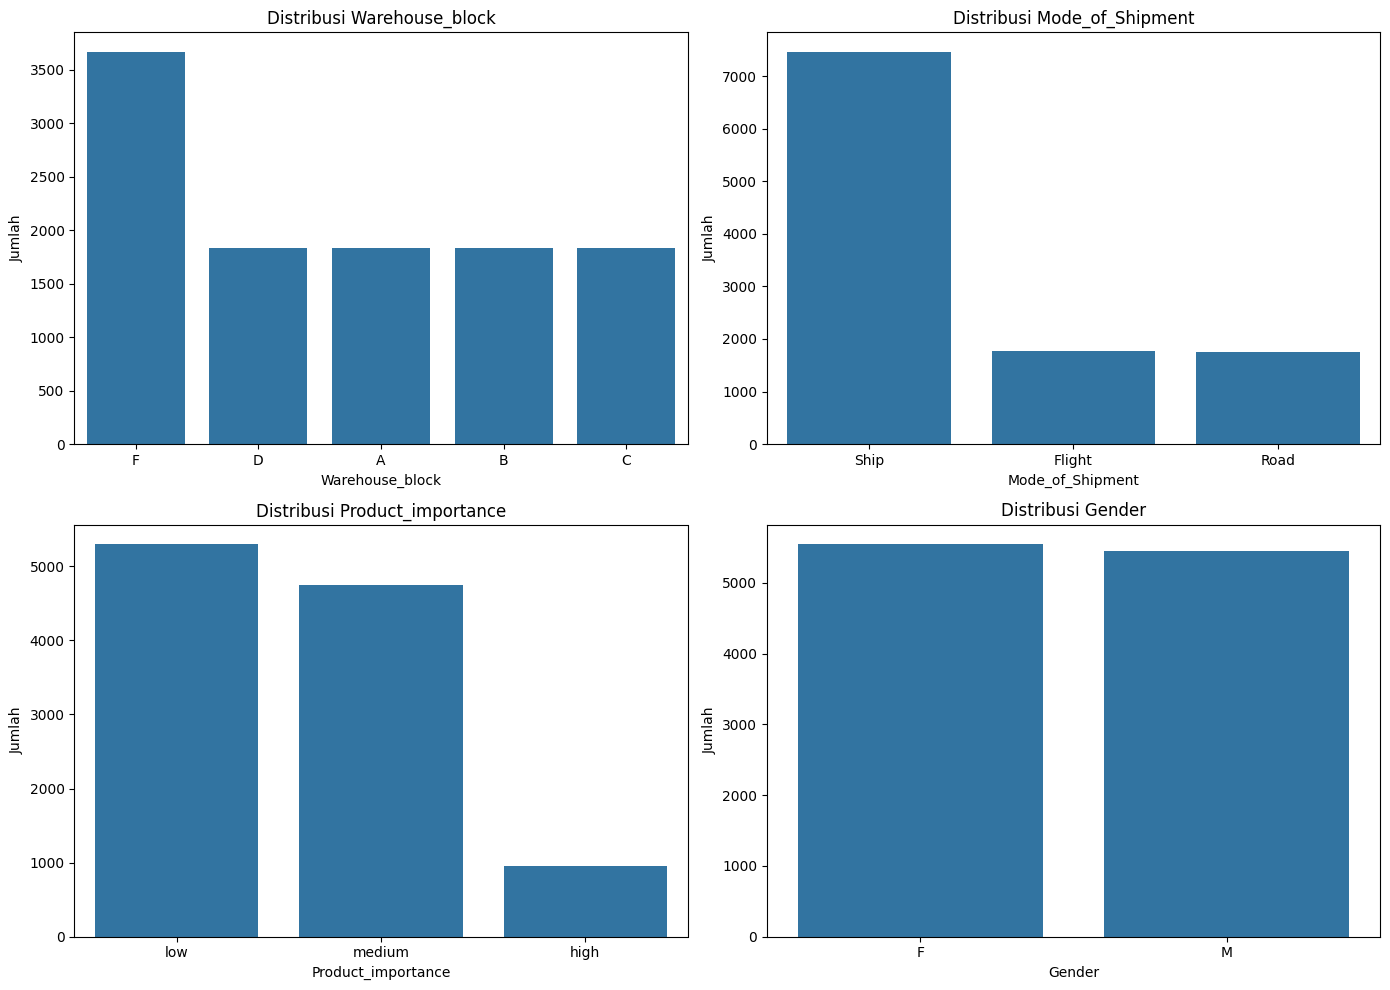

In [27]:
# Menampilkan histogram perbandingan kelas pada setiap kolom kategorikal

n_cols = 2
n_rows = math.ceil(len(categorical_features) / n_cols)

plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order)
    plt.title(f"Distribusi {col}")
    plt.ylabel("Jumlah")


plt.tight_layout()
plt.show()

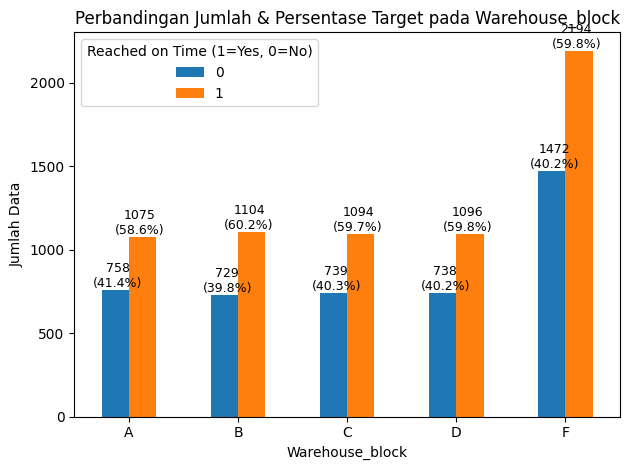

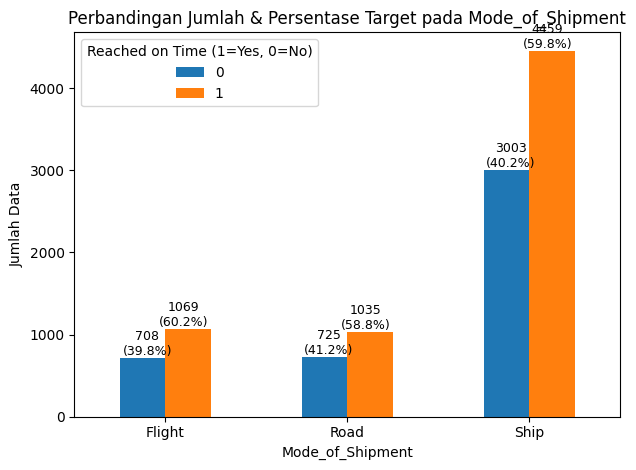

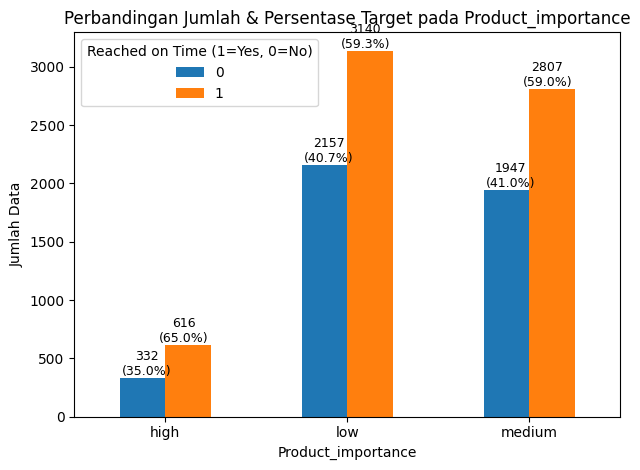

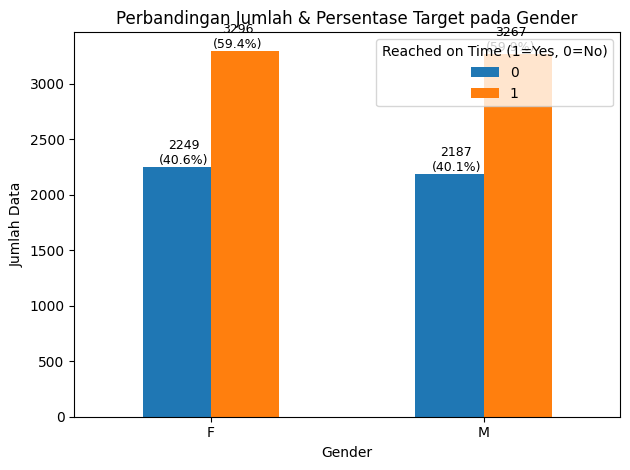

In [28]:
# Memvisualisasikan groupby target untuk setiap kolom kategorikal
target_col = "Reached.on.Time_Y.N"
for col in categorical_features:
    # Hitung jumlah kombinasi kategori vs target
    count_df = (
        df.groupby([col, target_col])
        .size()
        .unstack(fill_value=0)
    )

    ax = count_df.plot(kind="bar")

    # Total per kategori (untuk persentase)
    total_per_category = count_df.sum(axis=1)

    # Annotasi tiap bar
    for i, category in enumerate(count_df.index):
        for j, target_val in enumerate(count_df.columns):
            count = count_df.loc[category, target_val]
            percentage = (count / total_per_category[category]) * 100

            ax.text(
                i + (j - 0.5) * 0.2,   # offset horizontal agar tidak tumpang tindih
                count,
                f"{count}\n({percentage:.1f}%)",
                ha="center",
                va="bottom",
                fontsize=9
            )

    plt.title(f"Perbandingan Jumlah & Persentase Target pada {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah Data")
    plt.legend(title="Reached on Time (1=Yes, 0=No)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

In [29]:
# Menghilangkan kolom ID
df = df.drop(columns=['ID'])

In [30]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Karena tidak ada data yang hilang, maka kode berikutnya tidak dipakai pada file ini.

In [31]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# categorical_null_cols = df.columns[(df.isnull().any()) & (df.dtypes == 'object')]
# categorical_null_cols
# for column in categorical_null_cols:
#     df[column] = df[column].fillna(df[column].mode()[0])

# numerical_null_cols = df[numeric_features].columns[df[numeric_features].isnull().any()]
# df[numerical_null_cols] = df[numerical_null_cols].fillna(df[numerical_null_cols].median())

In [32]:
df.duplicated().sum()

np.int64(0)

Karena tidak ada data yang duplikat, maka kode berikutnya tidak dipakai pada file ini.

In [33]:
# Menghapus data duplikat menggunakan drop_duplicates().
# df = df.drop_duplicates()

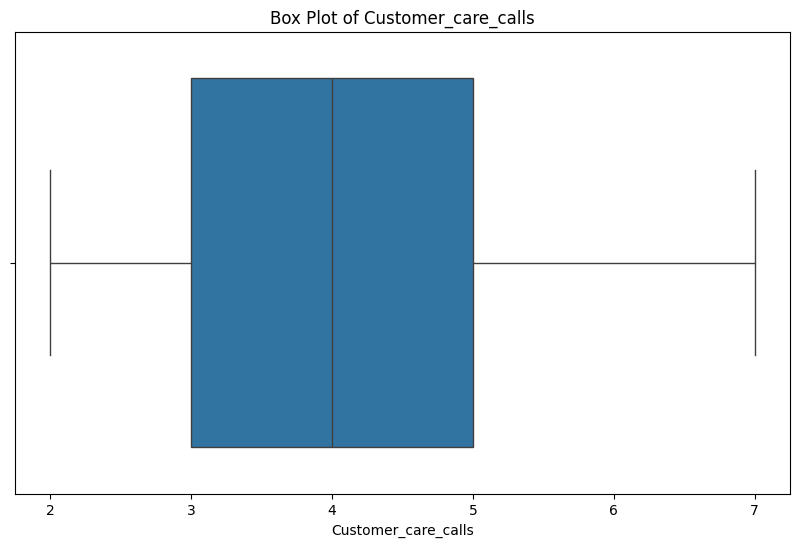

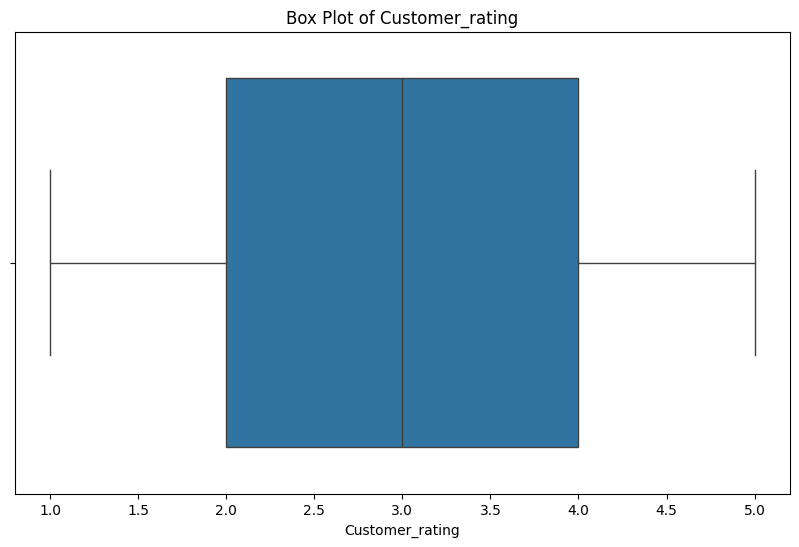

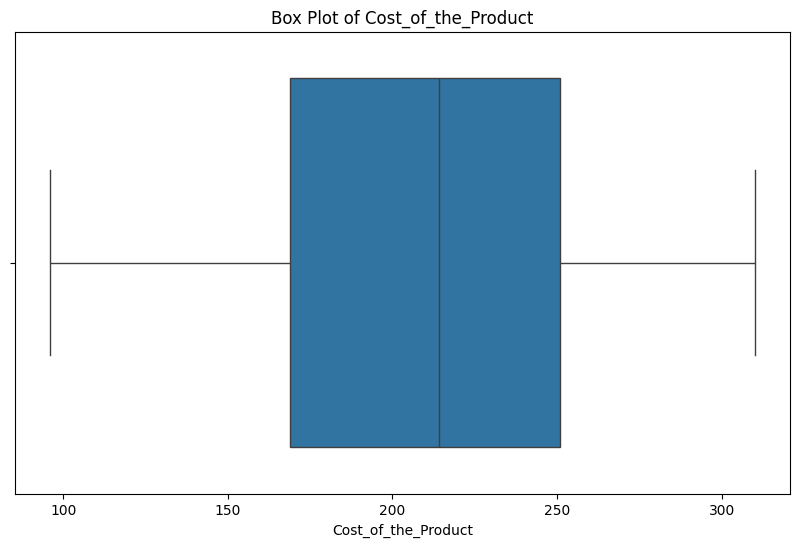

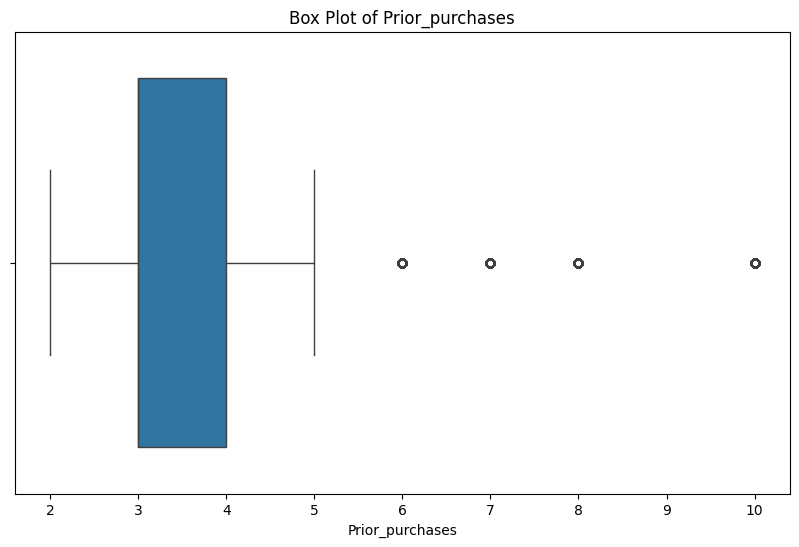

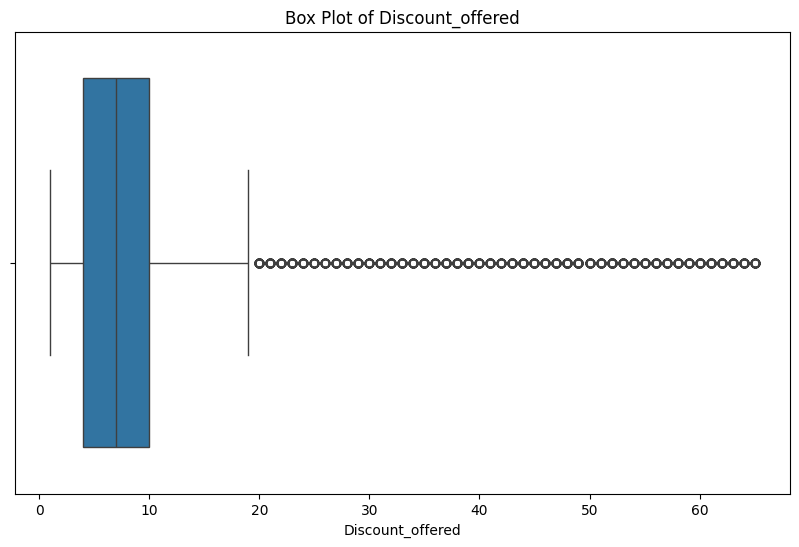

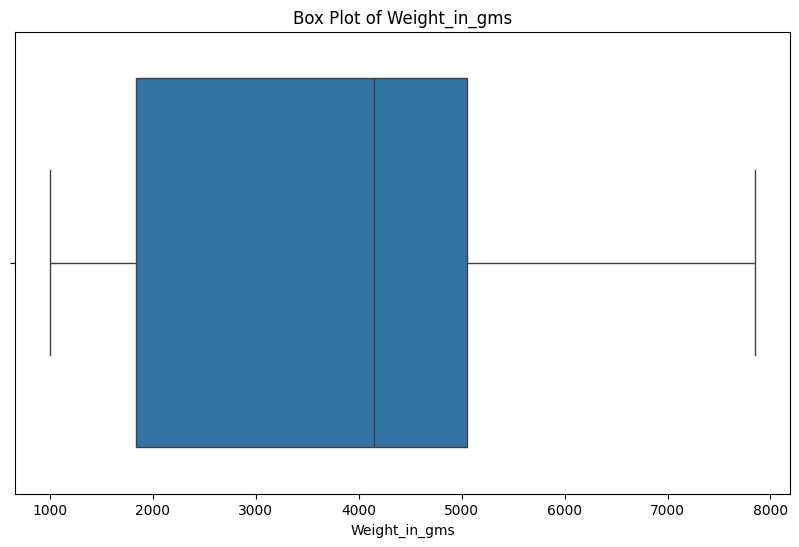

In [37]:
# Visualisasi bar chart untuk identifikasi outliers

numeric_features = df.drop(columns=['Reached.on.Time_Y.N']).select_dtypes(include=['number']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [38]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
# Menghitung persentase outlier per kolom
outlier_mask = (
    (df[numeric_features] < (Q1 - 1.5 * IQR)) |
    (df[numeric_features] > (Q3 + 1.5 * IQR))
)
outlier_ratio = outlier_mask.mean()
high_outlier_columns = outlier_ratio[outlier_ratio > 0.5].index.tolist()
summary = pd.DataFrame({
    "outlier_ratio": outlier_ratio,
    "outlier_percentage": outlier_ratio * 100
}).sort_values("outlier_ratio", ascending=False)

summary

,outlier_ratio,outlier_percentage
Discount_offered,0.200836,20.083644
Prior_purchases,0.091190,9.119011
Customer_rating,0.000000,0.000000
Customer_care_calls,0.000000,0.000000
Cost_of_the_Product,0.000000,0.000000
Weight_in_gms,0.000000,0.000000


Pada dataset ini, data yang memiliki outliers < 30% dari keseluruhan dataset, sehingga outliers tidak dihapus

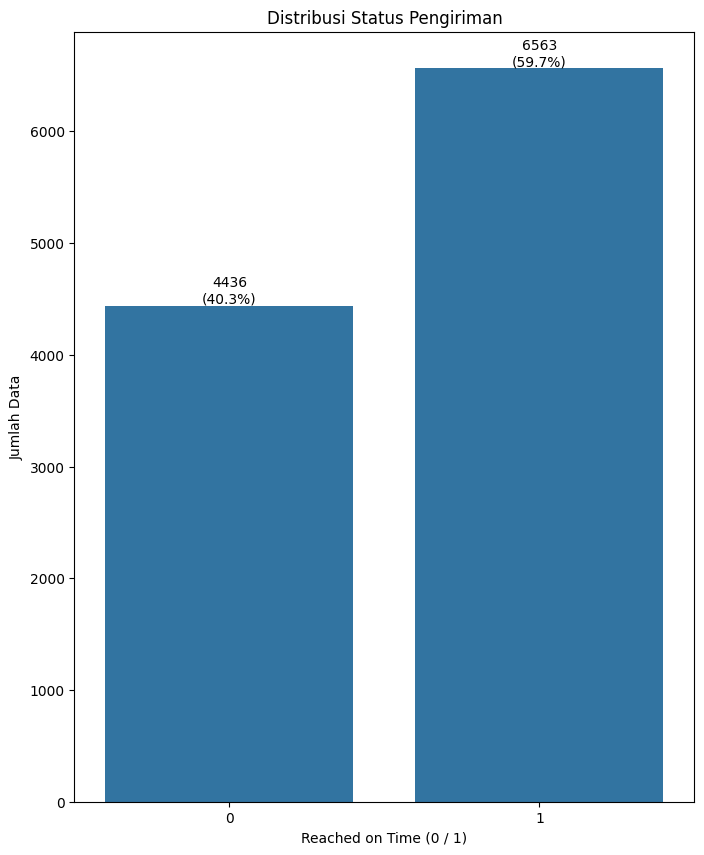

In [39]:
# Visualisasi perbandingan jumlah kelas

plt.figure(figsize=(8, 10))
ax = sns.countplot(x="Reached.on.Time_Y.N", data=df)
plt.title("Distribusi Status Pengiriman")
plt.xlabel("Reached on Time (0 / 1)")
plt.ylabel("Jumlah Data")

# Hitung persentase
counts = df["Reached.on.Time_Y.N"].value_counts(normalize=True) * 100
total = df.shape[0]

# Anotasi jumlah + persentase
for p in ax.patches:
    count = int(p.get_height())
    category = int(p.get_x() + p.get_width() / 2)
    percentage = counts.loc[category]

    ax.annotate(
        f"{count}\n({percentage:.1f}%)",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()

Perbandingan persentase antara pengiriman yang telat dan tepat waktu adalah 40%:60%. Jumlah kelas berbeda 20%, sehingga tidak terlalu imbalance.

In [40]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [41]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [46]:
# Exporting preprocessed dataset into folder "shipping_preprocessing"
os.makedirs("shipping_preprocessing", exist_ok=True)
df.to_csv("shipping_preprocessing\Shipping.csv")

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31084\3388901784.py:3: SyntaxWarning: invalid escape sequence '\S'
  df.to_csv("shipping_preprocessing\Shipping.csv")
